In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Stage-1: Data Processing

In [2]:
# Reading the provided example data
data = pd.read_csv('Fruit.csv')

In [3]:
# Shuffle rows and display data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Weight,Surface,Fruit
0,165.705817,0.580310,Orange
1,157.358702,0.460595,Orange
2,153.769691,0.409427,Orange
3,165.020345,0.396759,Orange
4,140.726711,0.763788,Apple


In [4]:
# Convert the string object to numeric
data['label'] = data['Fruit'].apply(lambda x: 0 if x=='Apple' else 1)
data.head()

,Weight,Surface,Fruit,label
0,165.705817,0.580310,Orange,1
1,157.358702,0.460595,Orange,1
2,153.769691,0.409427,Orange,1
3,165.020345,0.396759,Orange,1
4,140.726711,0.763788,Apple,0


In [5]:
fruits = data.drop(["Fruit"], axis=1, inplace=False)
fruits.head()

,Weight,Surface,label
0,165.705817,0.580310,1
1,157.358702,0.460595,1
2,153.769691,0.409427,1
3,165.020345,0.396759,1
4,140.726711,0.763788,0


## Stage-2: Split Data in two sets (Train and Validation)

In [6]:
# Get features X as array
features = fruits.drop(['label'], axis=1, inplace=False)
X = features.values
X[0:4]

array([[165.7058175 ,   0.58031036],
       [157.3587019 ,   0.46059484],
       [153.7696911 ,   0.40942741],
       [165.0203452 ,   0.39675899]])

In [7]:
# Get label Y for features
Y = fruits['label'].values
Y[0:4]

array([1, 1, 1, 1], dtype=int64)

In [8]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160,), (40,))

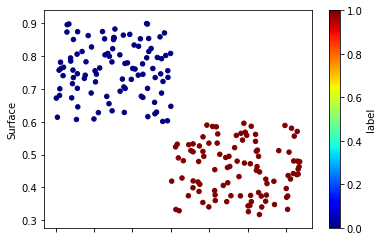

In [9]:
#Plot the data in 2-d space
fruits.plot(kind='scatter', x='Weight', y='Surface',
           c='label', cmap=plt.get_cmap('jet'))

## Stage-3: Training

In [10]:
# Initializing ML algorithm
model = KNeighborsClassifier()

# Providing the training data X and Y to our ML algorithm
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Now our ML algorithm has learnt the function for given X,Y -> Model is ready for testing

## Stage-4: Testing the trained ML model
#### Note - we are only giving X not Y - Model predict Y based on funtion it learnt during training

In [11]:
# Testing the trained model with Test dataset
prediction = model.predict(X_test)

In [12]:
# Print the score on the testing data
print("KNN Test Score:")
print(accuracy_score(y_test, prediction)*100)

KNN Test Score:
97.5


In [13]:
# show the inputs and predicted outputs
for i in range(len(X_test)):
    print(f"X={X_test[i]}, ActualLabel:{y_test[i]}, Prediction:{prediction[i]}")

X=[137.1845778    0.71588208], ActualLabel:0, Prediction:0
X=[139.9804093    0.60838281], ActualLabel:0, Prediction:0
X=[147.1285051    0.81395036], ActualLabel:0, Prediction:0
X=[154.1648757    0.35419288], ActualLabel:1, Prediction:1
X=[161.4184704    0.38451976], ActualLabel:1, Prediction:1
X=[136.7168311    0.89762252], ActualLabel:0, Prediction:0
X=[138.9454156    0.78255369], ActualLabel:0, Prediction:0
X=[141.9925135    0.79900269], ActualLabel:0, Prediction:0
X=[148.6740127    0.74573097], ActualLabel:0, Prediction:0
X=[155.7754433    0.36014337], ActualLabel:1, Prediction:1
X=[143.9315013    0.62829619], ActualLabel:0, Prediction:0
X=[148.7837263    0.68727348], ActualLabel:0, Prediction:0
X=[164.8558706    0.58865238], ActualLabel:1, Prediction:1
X=[148.583763     0.85842869], ActualLabel:0, Prediction:0
X=[165.0694538    0.36996378], ActualLabel:1, Prediction:1
X=[137.0845218    0.67267192], ActualLabel:0, Prediction:0
X=[162.4396361    0.37679855], ActualLabel:1, Prediction